<a href="https://colab.research.google.com/github/pjseoane/AlgoTrading/blob/master/Packs_V5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pandas_datareader import data as pdr
#https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

import collections

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
!pip install yfinance

In [3]:
import yfinance as yf
#https://pypi.org/project/yfinance/
yf.pdr_override() # <== that's all it takes :-)

In [21]:
class cNewPack():
  def __init__(self, pack_dictionary,start_date,end_date):
    
    self.pack_dictionary=pack_dictionary
    self.start_date=start_date
    self.end_date=end_date

    sortedPack=collections.OrderedDict(sorted(self.pack_dictionary.items())) 
    sortedTupleKeys=list(sortedPack.keys())
    sortedTupleValues=list(sortedPack.values())
    CCL=['GGAL.BA','GGAL']

    self.panel_stocks = pdr.get_data_yahoo(sortedTupleKeys, start=self.start_date, end=self.end_date)
    self.panel_CCL=pdr.get_data_yahoo(CCL, start=self.start_date, end=self.end_date)
    self.panel_CCL['FX']=self.panel_CCL.Close['GGAL.BA']*10/self.panel_CCL.Close['GGAL']

    
    self.panel_stocks_wgt=self.panel_stocks.Close * sortedTupleValues
    self.panel_stocks_wgt['Pack_USD']=self.panel_stocks_wgt.sum(axis=1)

    self.panel_stocks_wgt['CCL']=self.panel_CCL.FX
    self.panel_stocks_wgt['Pack_ARS']=self.panel_stocks_wgt.Pack_USD*self.panel_stocks_wgt.CCL

    #para llenar los gaps
    self.panel_normalized=self.panel_stocks_wgt.ffill().bfill()

  def getPanelNormalized(self):
    return self.panel_normalized

  def getPanelCCL(self):
    return self.panel_CCL.FX

  def getPanelStocks(self):
    return self.panel_stocks

  def getPackPlot(self):
    #https://www.geeksforgeeks.org/how-to-add-a-y-axis-label-to-the-secondary-y-axis-in-matplotlib/
    
    y1=self.panel_normalized['Pack_ARS']
    y2=self.panel_normalized['CCL']
    fig, ax=plt.subplots(figsize = (10, 5))
    plt.title('Packs vs CCL')

    ax.set_xlabel('Fechas', color = 'r')
    ax2=ax.twinx()
    ax.set_ylabel('Pack ARS', color = 'g')
    ax2.set_ylabel('CCL', color = 'b')
    
    ax.plot(y1,color='g')
    ax2.plot(y2,color='b')

    plt.tight_layout()
    plt.show()

    return

  def writePanel_to_CSV(self):
    self.panel_normalized.to_csv('pack table', index=None)
    return

  def getCorrelationMatrix(self):
    return self.panel_stocks.Close.corr()

  


In [22]:
Pack_5G={'AAPL': 8/10,'QCOM': 8/11, 'ADI': 2/3, 'AMD': 1/0.5}
start_date = '2021-05-07'
end_date = '2021-08-08'
Pack_5G=cNewPack(Pack_5G,start_date,end_date)

[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  2 of 2 completed


In [32]:
Pack_5G.getPanelNormalized().describe()

,AAPL,ADI,AMD,QCOM,Pack_USD,CCL,Pack_ARS
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,108.218750,108.915833,173.604062,100.109318,490.847963,169.625291,83439.811402
std,7.281517,4.287310,20.582155,4.352891,33.666689,7.743124,9347.675671
min,98.215997,97.260000,146.179993,90.632729,435.495394,156.241873,68042.616219
25%,101.457999,108.106669,160.100002,97.134546,467.292094,164.216284,77068.478654
50%,106.608002,109.659999,169.209999,99.985451,483.024181,168.437252,81876.733319
75%,116.343997,111.635000,181.865002,103.445454,511.598637,175.234855,89021.354659
max,119.319995,115.053335,237.539993,109.810913,577.949690,182.734283,104226.984114


In [11]:
Pack_5G.getPanelNormalized()

,AAPL,ADI,AMD,QCOM,Pack_USD,CCL,Pack_ARS
Date,,,,,,,
2021-05-07,104.168005,104.839996,157.619995,100.254550,466.882547,156.780734,73198.188316
2021-05-10,101.479999,100.526662,151.979996,93.774547,447.761204,156.863983,70237.605685
2021-05-11,100.728003,100.559998,153.660004,93.359996,448.308001,156.369429,70101.665914
2021-05-12,98.215997,97.366669,149.279999,90.632729,435.495394,156.241873,68042.616219
2021-05-13,99.976001,97.753337,146.179993,92.443637,436.352967,157.537690,68742.038281
...,...,...,...,...,...,...,...
2021-08-02,116.416003,111.746663,217.259995,108.261819,553.684480,182.734283,101177.136698
2021-08-03,117.888000,112.453328,225.119995,107.599998,563.061322,181.546132,102221.605008
2021-08-04,117.559998,115.053335,237.539993,107.796365,577.949690,180.339199,104226.984114


In [7]:
Pack_5G.getPanelCCL()

Date
2021-05-06           NaN
2021-05-07    156.780734
2021-05-10    156.863983
2021-05-11    156.369429
2021-05-12    156.241873
                 ...    
2021-08-02    182.734283
2021-08-03    181.546132
2021-08-04    180.339199
2021-08-05    179.938263
2021-08-06    177.101088
Freq: B, Name: FX, Length: 67, dtype: float64

In [8]:
Pack_5G.getPanelStocks()

Adj Close                          ...    Volume                     
                  AAPL         ADI         AMD  ...       ADI        AMD      QCOM
Date                                            ...                               
2021-05-07  130.015213  156.597870   78.809998  ...   2706500   36954200   6893700
2021-05-10  126.660225  150.155106   75.989998  ...   4132300   45134500  19537200
2021-05-11  125.721642  150.204895   76.830002  ...   4643100   51008200  11948000
2021-05-12  122.586334  145.435074   74.639999  ...   4733000   42531400  13529600
2021-05-13  124.783043  146.012634   73.089996  ...   4053200   48646800  10633000
...                ...         ...         ...  ...       ...        ...       ...
2021-08-02  145.302307  167.619995  108.629997  ...   2822000  115581900  10823800
2021-08-03  147.139542  168.679993  112.559998  ...   3271200  157723100   6223400
2021-08-04  146.730164  172.580002  118.769997  ...  10201100  225368700   5556400
2021-08-05  146.839996  169.929993  112.349998  ...   3468300  137860900   7169200
2021-08-06  146.139999  171.130005  110.110001  ...   3164200  143792800   5732300

[64 rows x 24 columns]

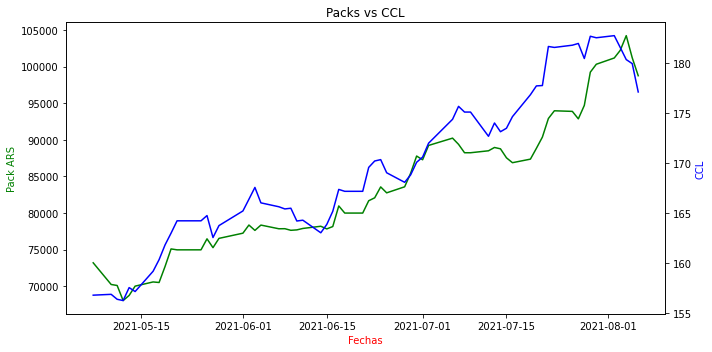

In [9]:
Pack_5G.getPackPlot()

In [34]:
Pack_5G.getCorrelationMatrix()

,AAPL,ADI,AMD,QCOM
AAPL,1.000000,0.448763,0.788998,0.879651
ADI,0.448763,1.000000,0.624709,0.695609
AMD,0.788998,0.624709,1.000000,0.909584
QCOM,0.879651,0.695609,0.909584,1.000000


In [36]:
ticker=yf.Ticker('QCOM')
ticker.history(period="1y")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-08-10,106.503620,106.886091,103.679217,104.306862,10087100,0.0,0
2020-08-11,104.149943,109.847794,102.718128,106.729179,17803000,0.0,0
2020-08-12,108.259071,114.005952,107.533357,113.554832,18664700,0.0,0
2020-08-13,113.956916,113.956916,110.593127,111.220779,9958400,0.0,0
2020-08-14,111.112894,112.309337,110.396983,111.544395,6641000,0.0,0
...,...,...,...,...,...,...,...
2021-08-03,148.910004,149.580002,146.559998,147.949997,6223400,0.0,0
2021-08-04,148.020004,149.199997,147.330002,148.220001,5556400,0.0,0
2021-08-05,147.240005,147.470001,144.570007,146.830002,7169200,0.0,0
